# Technical Indicators

Importing Libraries and Modules

In [1]:
import numpy as np

import pandas as pd
from pandas_datareader import data as web

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode()

import warnings
warnings.simplefilter("ignore")

from datetime import date, timedelta
import time

import yfinance as yf

import cufflinks as cf
cf.go_offline()

from scipy.signal import argrelextrema
from scipy.stats import linregress


Importing Stock Data

In [2]:
#fetching historical stock data
stock_name = input("Enter stock name\n")
stock_data = yf.download(tickers = stock_name + '.NS' ,period = '10y', interval = '1d')
x_axis = stock_data.index
stock_data

Enter stock name
TATAELXSI
[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2012-08-21    110.349998    111.625000    108.925003    110.025002   
2012-08-22    109.449997    110.775002    109.449997    110.000000   
2012-08-23    110.349998    113.375000    108.625000    110.349998   
2012-08-24    109.849998    111.000000    108.724998    109.375000   
2012-08-27    109.849998    110.375000    107.099998    109.925003   
...                  ...           ...           ...           ...   
2022-08-11   9501.250000   9575.000000   9462.299805   9498.650391   
2022-08-12   9500.000000  10374.950195   9498.650391  10238.049805   
2022-08-16  10430.000000  10719.400391  10380.650391  10579.099609   
2022-08-17  10623.000000  10760.000000  10482.000000  10684.900391   
2022-08-18  10688.000000  10699.950195  10563.000000  10614.150391   

               Adj Close   Volume  
Date                               
2012-08-21     95.243652    31990  
2012-08-22     95.222008    44390  
2012-08-23     95.524986   131448  
2012-08-24     94.680969   107966  
2012-08-27     95.157082    35882  
...                  ...      ...  
2022-08-11   9498.650391   241351  
2022-08-12  10238.049805  1945184  
2022-08-16  10579.099609   885284  
2022-08-17  10684.900391   612250  
2022-08-18  10614.150391   250578  

[2463 rows x 6 columns]

Plotting Technical Indicators

1.) Simple Moving Average (SMA)

Shorter Period for SMA

Longer Period for SMA

Period for average Volume



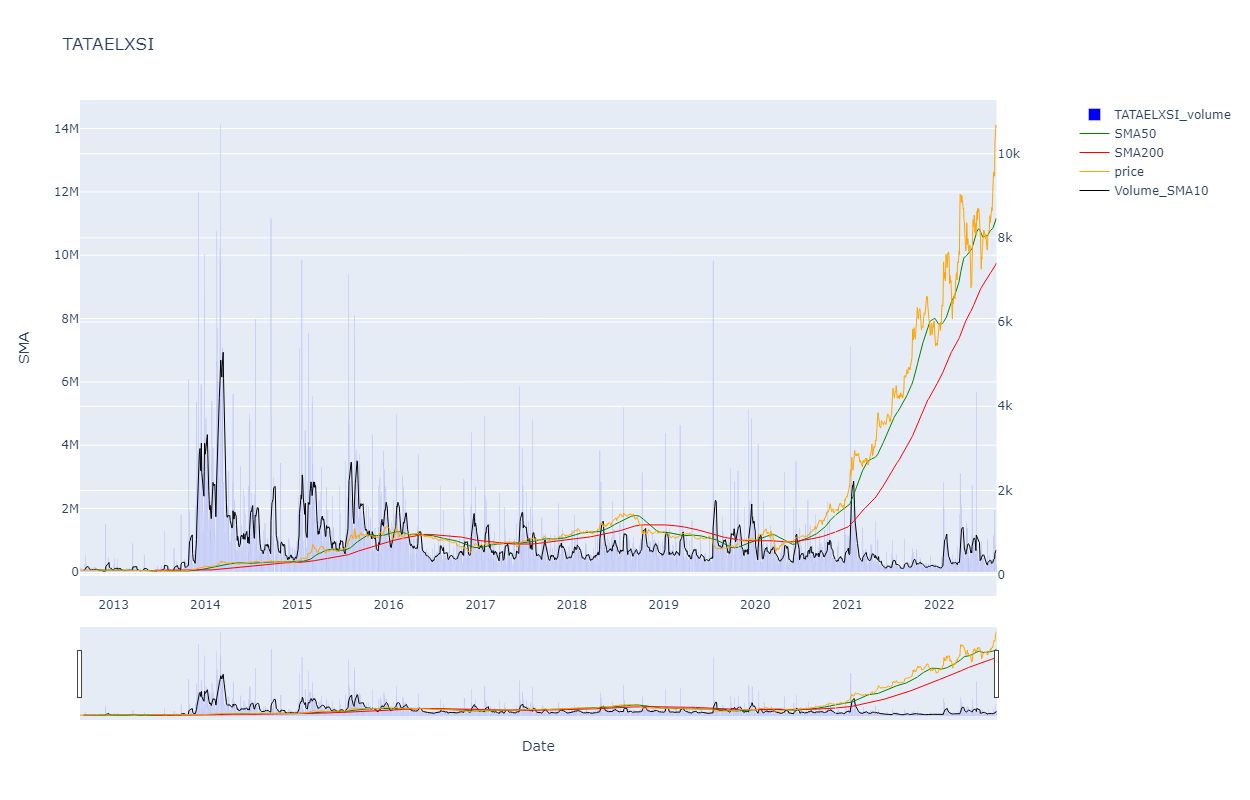

In [3]:
#SMA for price and volume

#taking input from user for SMA parameters
x = int(input("Shorter Period for SMA\n") or 50)
y = int(input("Longer Period for SMA\n") or 200)
z = int(input("Period for average Volume\n") or 10)

#fetching data to be plotted
MAx_data = stock_data['Close'].rolling(x).mean()
MAy_data = stock_data['Close'].rolling(y).mean()
price_data = stock_data['Close']
Volume_MA_data = stock_data['Volume'].rolling(z).mean()

#plotting SMA
MAx = go.Scatter(x=x_axis, y=MAx_data, line=dict(color='green', width=1), name="SMA"+str(x))
MAy = go.Scatter(x=x_axis, y=MAy_data, line=dict(color='red', width=1), name="SMA"+str(y))
price = go.Scatter(x=x_axis, y=price_data, line=dict(color='orange', width=1), name="price")
stock_volume = go.Bar(x=x_axis, y=stock_data['Volume'], marker_color='blue',name=stock_name + '_volume' )
MA_volume = go.Scatter(x=x_axis, y=Volume_MA_data, line=dict(color='black', width=1), name="Volume_SMA"+str(z))

#storing SMA data
stock_data["SMA"+str(x)] = MAx_data
stock_data["SMA"+str(y)] = MAy_data
stock_data["Volume_SMA"+str(z)] = Volume_MA_data

fig = make_subplots(specs=[[{"secondary_y": True}]])

#removing time period when the market is closed
fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), 
        dict(values=[])
        #dict(bounds=[15.5, 9.25], pattern="hour")
    ]
)

#labelling the chart
fig.update_layout(xaxis_title='Date',
                  yaxis_title="SMA",
                  title=stock_name,
                  width=1250, height=800)

fig.add_trace(trace=stock_volume, secondary_y = False)
fig.add_trace(trace=MAx, secondary_y = True)
fig.add_trace(trace=MAy, secondary_y = True)
fig.add_trace(trace=price, secondary_y = True)
fig.add_trace(trace = MA_volume, secondary_y=False)
fig.update_xaxes(rangeslider_visible=True)
fig.show("png")

2.) Exponential Moving Average (EMA)

Shorter Period for EMA

Longer Period for EMA



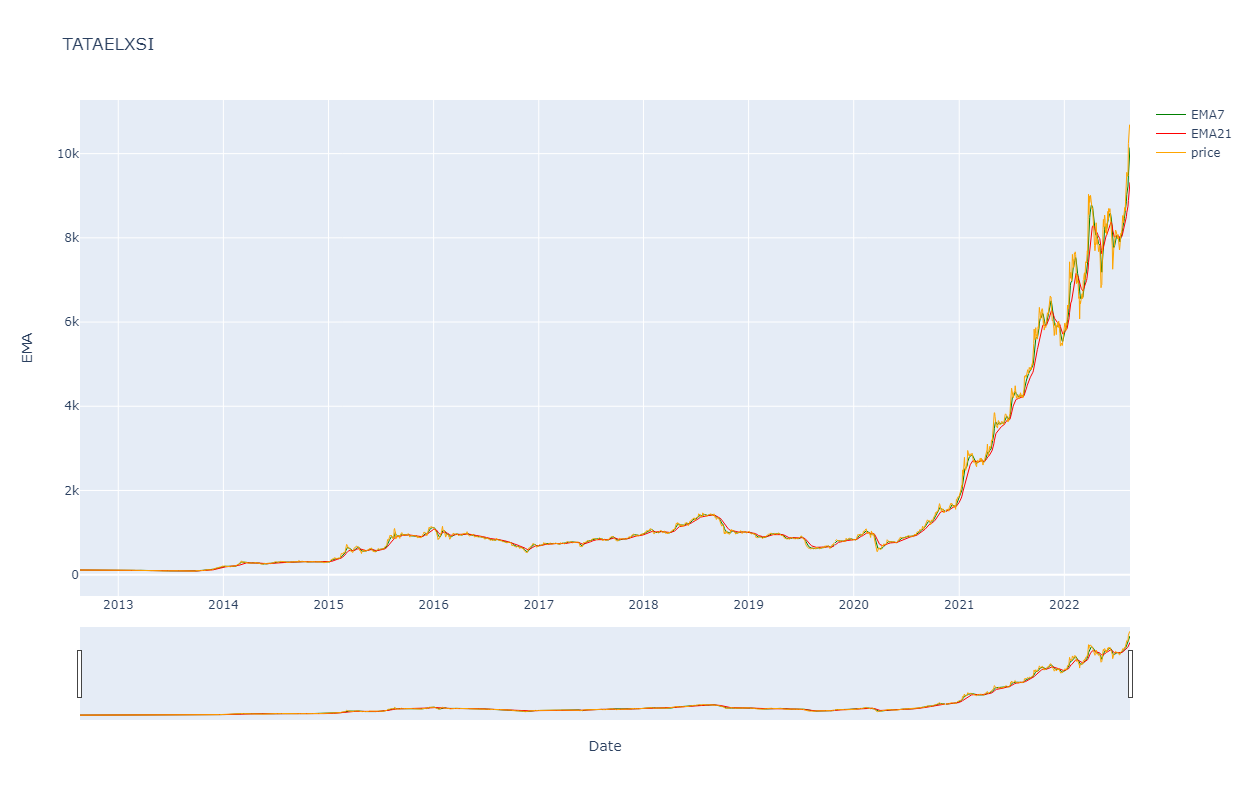

In [4]:
#EMA

#user input for EMA parameters
x = int(input("Shorter Period for EMA\n") or 7)
y = int(input("Longer Period for EMA\n") or 21)

#fetching data to plot EMA
EMAx_data = stock_data['Close'].ewm(span=x, adjust=False).mean()
EMAy_data = stock_data['Close'].ewm(span=y, adjust=False).mean()
price_data = stock_data['Close']

#storing EMA data
stock_data["EMA"+str(x)] = EMAx_data
stock_data["EMA"+str(y)] = EMAy_data

#plotting EMA
EMAx = go.Scatter(x=x_axis, y=EMAx_data, line=dict(color='green', width=1), name="EMA"+str(x))
EMAy = go.Scatter(x=x_axis, y=EMAy_data, line=dict(color='red', width=1), name="EMA"+str(y))
price = go.Scatter(x=x_axis, y=price_data, line=dict(color='orange', width=1), name="price")

fig = go.Figure()

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), 
        dict(values=[])                        
        #dict(bounds=[15.5, 9.25], pattern="hour")
    ]
)
#labelling the chart
fig.update_layout(xaxis_title='Date',
                  yaxis_title="EMA",
                  title=stock_name,
                  width=1250, height=800)

fig.add_trace(trace=EMAx)
fig.add_trace(trace=EMAy)
fig.add_trace(trace=price)
fig.update_xaxes(rangeslider_visible=True)
fig.show("png")

3.) Relative Strength Index (RSI)

Enter the time period for RSI

Enter overbought region
Enter oversold region


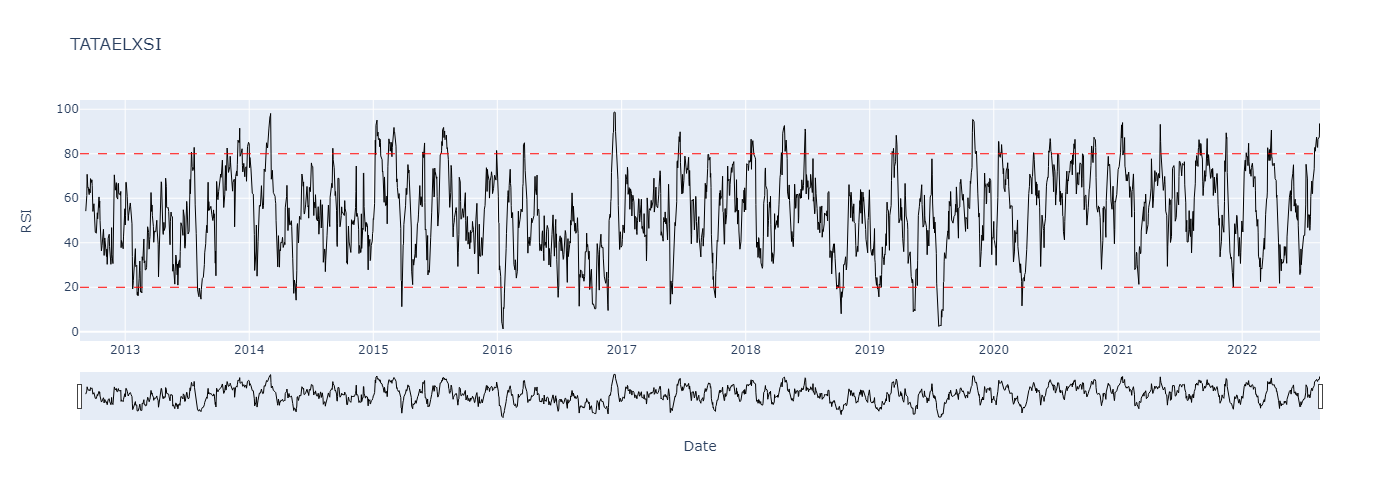

In [5]:
#RSI

#taking input from user for RSI parameter
period = int(input("Enter the time period for RSI\n") or 14)
a = int(input("Enter overbought region") or 80)
b = int(input("Enter oversold region") or 20)

#defining a function to calculate RSI 
def RSI(df,period):
    temp_df = pd.DataFrame()
    temp_df = df
    temp_df['Price_Change'] = temp_df['Close'] - temp_df['Close'].shift(1)
    temp_df['Daily_gain'] = np.where(temp_df['Price_Change']>=0,temp_df['Price_Change'],0)
    temp_df['Daily_loss'] = np.where(temp_df['Price_Change']<0,abs(temp_df['Price_Change']),0)
    temp_df['Avg_gain'] = temp_df['Daily_gain'].rolling(period).sum()
    temp_df['Avg_loss'] = temp_df['Daily_loss'].rolling(period).sum()
    temp_df['RS'] = temp_df['Avg_gain']/temp_df['Avg_loss']
    temp_df['RSI'] = (temp_df['RS']/(1+temp_df['RS']))*100
    df['RSI_'+str(period)] = temp_df['RSI']
    
RSI(stock_data,period)

#plotting RSI    
RSI_data = stock_data['RSI_'+str(period)]

RSI_curve = go.Scatter(x=x_axis, y=RSI_data, 
                      line=dict(color='black', width=1), name="RSI")

fig = go.Figure()
fig.add_trace(RSI_curve)
                                              
fig.update_xaxes(
    rangeslider_visible=True)
fig.update_yaxes(title="RSI")

#labelling the chart
fig.update_layout(xaxis_title='Date',
                  yaxis_title="RSI",
                  title=stock_name,
                  width=1400, height=500)

fig.add_hline(y=b, line_width=1, line_dash="dash", line_color="red")
fig.add_hline(y=a, line_width=1, line_dash="dash", line_color="red")

fig.show("png")

4.) Moving Average Convergence and Divergence (MACD)

Shorted Period

Longer Period

Signal Period



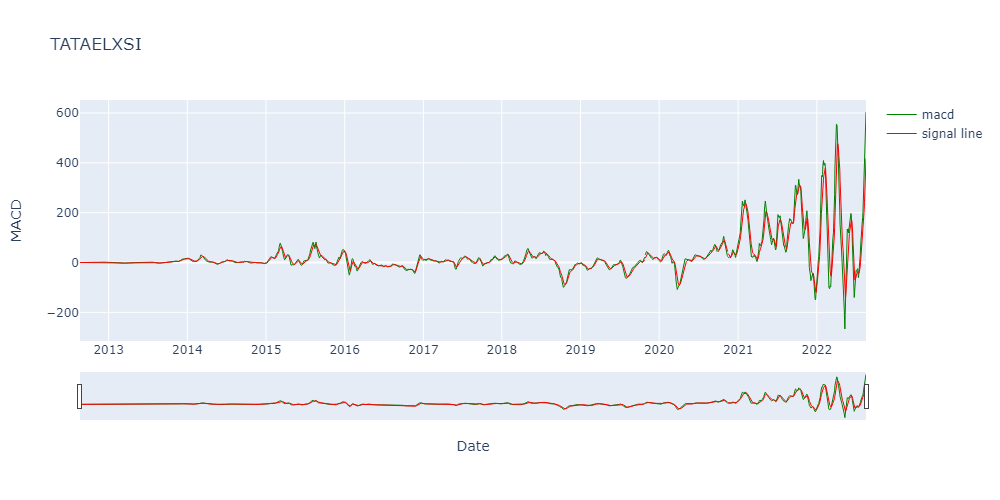

In [6]:
# MACD

#taking input from user for MACD parameters
sp = int(input("Shorted Period\n") or 12)
lp = int(input("Longer Period\n") or 26)
signal = int(input("Signal Period\n") or 9)

#fetching data for plotting MACD
ema_sp = stock_data['Close'].ewm(span = sp, adjust=False).mean()
ema_lp = stock_data['Close'].ewm(span = lp, adjust=False).mean()

macd_data = ema_sp - ema_lp

stock_data['MACD'+str(sp)+'_'+str(lp)] = macd_data

signal_line_data = macd_data.ewm(span = signal, adjust=False).mean()

#storing MACD data
stock_data['MACD_Signal_'+str(signal)] = signal_line_data

#plotting MACD
macd = go.Scatter(x = x_axis, y = macd_data, line=dict(color='green', width=1), name="macd")
signal_line = go.Scatter(x = x_axis, y = signal_line_data, line=dict(color='red', width=1), name="signal line")

fig = go.Figure()

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), 
        dict(values=[])                          #for holidays
        #dict(bounds=[15.5, 9.25], pattern="hour")
    ]
)

#labelling the chart
fig.update_layout(xaxis_title='Date',
                  yaxis_title="MACD",
                  title=stock_name,
                  width=1000, height=500)
fig.add_trace(trace=macd)
fig.add_trace(trace=signal_line)
fig.update_xaxes(rangeslider_visible=True)
fig.show("png")

5.) Bollinger Bands (BB)

Enter the period for Bollinger Bands

How many times the standard deviation do you want to enclose the band within?


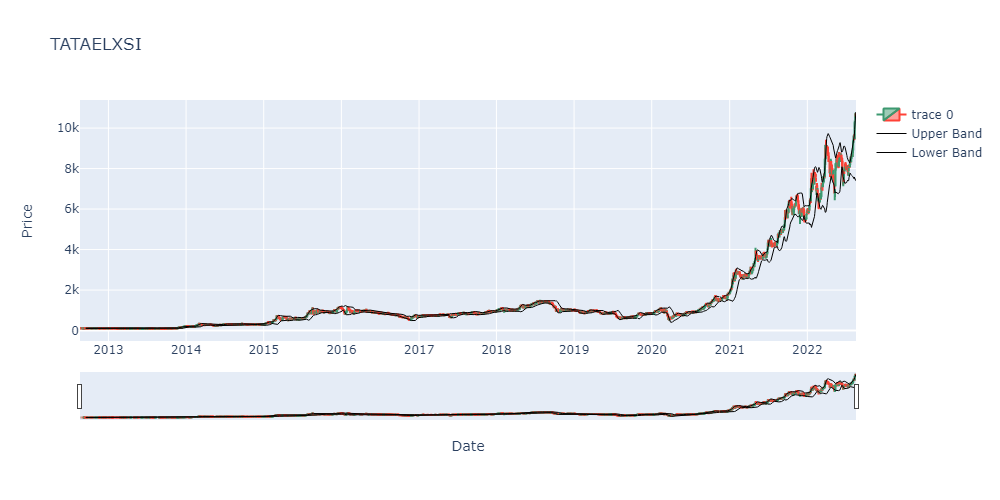

In [7]:
#Bollinger bands

#user input for BB parameters
x = int(input("Enter the period for Bollinger Bands\n") or 20)
y = float(input("How many times the standard deviation do you want to enclose the band within?") or 2)

#fetching data for plotting BB
SMA = stock_data['Close'].rolling(x).mean()
SD = stock_data['Close'].rolling(x).std(ddof=1)

plus_SD = SMA + (SD*y) 
minus_SD = SMA - (SD*y) 

#plotting BB
candle = go.Candlestick(x=x_axis,
                       open=stock_data['Open'],
                       low=stock_data['Low'],
                       high=stock_data['High'],
                       close=stock_data['Close'])

Upper_band = go.Scatter(x=x_axis, y=plus_SD, line=dict(color='Black', width=1), name="Upper Band")
Lower_band = go.Scatter(x=x_axis, y=minus_SD, line=dict(color='Black', width=1), name="Lower Band")

fig =go.Figure()

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), 
        dict(values=[])                      
        #dict(bounds=[15.5, 9.25], pattern="hour")
    ]
)

#labelling the chart
fig.update_layout(xaxis_title='Date',
                  yaxis_title="Price",
                  title=stock_name,
                  width=1000, height=500)
fig.add_trace(candle)
fig.add_trace(trace=Upper_band)
fig.add_trace(trace=Lower_band)
fig.show("png")

6.) ICHIMOKU

[*********************100%***********************]  1 of 1 completed


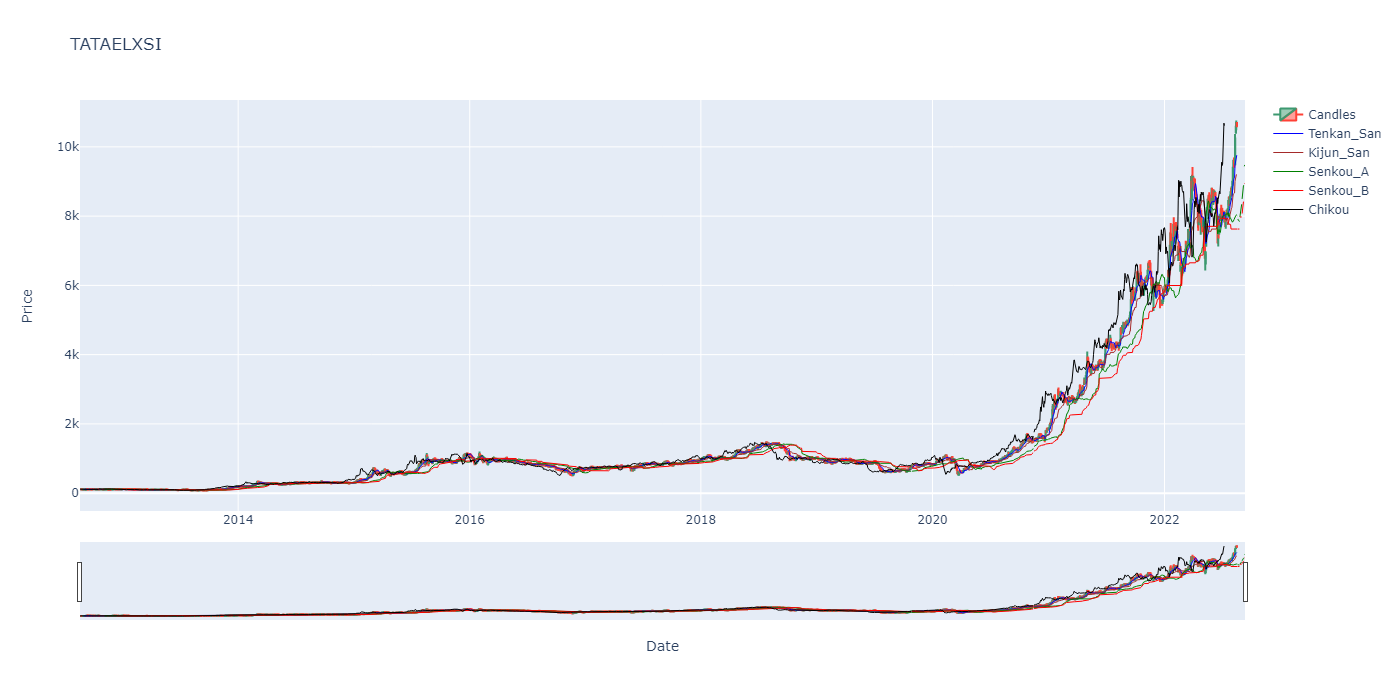

In [8]:
#fetching historical stock data to a new df
ichimoku_df = yf.download(tickers = stock_name + '.NS' ,period = '10y', interval = '1d')

#adding future days to our dataframe:
temp_table = [np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN]

date_series = pd.Series(stock_data.index)
sdate = date_series.iloc[date_series.shape[0]-1]
edate = sdate+timedelta(days=40)
delta = edate - sdate     
temp_list = []

for i in range(1,delta.days + 1):
    day = sdate + timedelta(days=i)
    temp_list.append(day)
    
temp_series= pd.Series(temp_list)
date_ser = date_series.append(temp_series, ignore_index=True)

for i in range(26):
    ichimoku_df.at[ichimoku_df.shape[0]] = temp_table

ichimoku_df = ichimoku_df.reset_index()

#Defining ichimoku curve's data

#Tenkan San

ichimoku_df['high_nine'] = ichimoku_df['High'].rolling(9).max()
ichimoku_df['low_nine'] = ichimoku_df['Low'].rolling(9).min()
ichimoku_df['Tenkan_San'] = (ichimoku_df['high_nine'] + ichimoku_df['low_nine'])/2

#Kijun San

ichimoku_df['high_twenty_six'] = ichimoku_df['High'].rolling(26).max()
ichimoku_df['low_twenty_six'] = ichimoku_df['Low'].rolling(26).min()
ichimoku_df['Kijun_San'] = (ichimoku_df['high_twenty_six'] + ichimoku_df['low_twenty_six'])/2

#Leading lines

ichimoku_df['Senkou_A'] = ((ichimoku_df['Tenkan_San'] + ichimoku_df['Kijun_San'])/2).shift(26)

ichimoku_df['high_fifty_two'] = ichimoku_df['High'].rolling(52).max()
ichimoku_df['low_fifty_two'] = ichimoku_df['Low'].rolling(52).min()

ichimoku_df['Senkou_B'] = ((ichimoku_df['high_fifty_two'] + ichimoku_df['low_fifty_two'])/2).shift(26)

#Lagging line

ichimoku_df['Chikou'] = ichimoku_df['Close'].shift(-26)

#Candlesticks
candle = go.Candlestick(x=date_ser,
                       open=ichimoku_df['Open'],
                       low=ichimoku_df['Low'],
                       high=ichimoku_df['High'],
                       close=ichimoku_df['Close'],
                       name='Candles')

#plotting ichimoku
fig = go.Figure()
                              
Conversion_Line = go.Scatter(x=date_ser, y=ichimoku_df['Tenkan_San'], line=dict(color='blue',width=1), name='Tenkan_San')
Base_Line = go.Scatter(x=date_ser, y=ichimoku_df['Kijun_San'], line=dict(color='Brown',width=1), name='Kijun_San')
Leading_A = go.Scatter(x=date_ser, y=ichimoku_df['Senkou_A'], line=dict(color='green',width=1), name='Senkou_A')
Leading_B = go.Scatter(x=date_ser, y=ichimoku_df['Senkou_B'], line=dict(color='red',width=1), name='Senkou_B')
Lagging = go.Scatter(x=date_ser, y=ichimoku_df['Chikou'], line=dict(color='Black',width=1), name='Chikou')


fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), 
        dict(values=[])                      
        #dict(bounds=[15.5, 9.25], pattern="hour")
    ]
)

#labelling the chart
fig.update_layout(xaxis_title='Date',
                  yaxis_title="Price",
                  title=stock_name,
                  width=1400, height=700)
fig.add_trace(trace=candle)
fig.add_trace(trace=Conversion_Line)
fig.add_trace(trace=Base_Line)
fig.add_trace(trace=Leading_A)
fig.add_trace(trace=Leading_B)
fig.add_trace(trace=Lagging)

fig.show("png")

7.) Stochastic Oscillator

Enter the period for Stochastic Oscillator

Enter overbought region

Enter oversold region



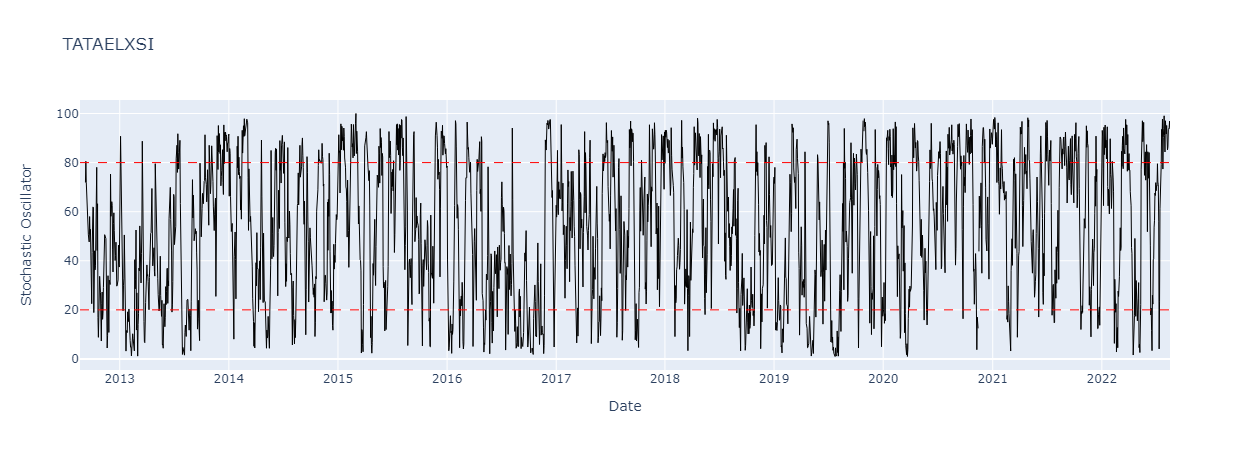

In [9]:
#Stochastic Oscillator

#getting input from user for indicator parameters
x = int(input('Enter the period for Stochastic Oscillator\n') or 14)
b = int(input('Enter overbought region\n') or 80)
a = int(input('Enter oversold region\n') or 20)

#getting necessary data to plot Stochastic Oscillator
high_val = stock_data['High'].rolling(window=x).max()
low_val = stock_data['Low'].rolling(window=x).min()
curr_val = stock_data['Close']
so_num = curr_val - low_val
so_den = high_val- low_val
so = (so_num/so_den)*100

#plotting the indicator
fig = go.Figure()

so_curve = go.Scatter(x=x_axis,y=so,
                     line=dict(color='black',width=1),
                     name='Stochastic_Curve')

fig.add_trace(trace=so_curve)
fig.add_hline(y=b, line_width=1, line_dash="dash", line_color="red")
fig.add_hline(y=a, line_width=1, line_dash="dash", line_color="red")

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), 
        dict(values=[])                      
        #dict(bounds=[15.5, 9.25], pattern="hour")
    ]
)

#labelling the chart
fig.update_layout(xaxis_title='Date',
                  yaxis_title="Stochastic Oscillator",
                  title=stock_name,
                  width=1250, height=450)

fig.show("png")


8.) Average True Range (ATR)

Enter period for ATR


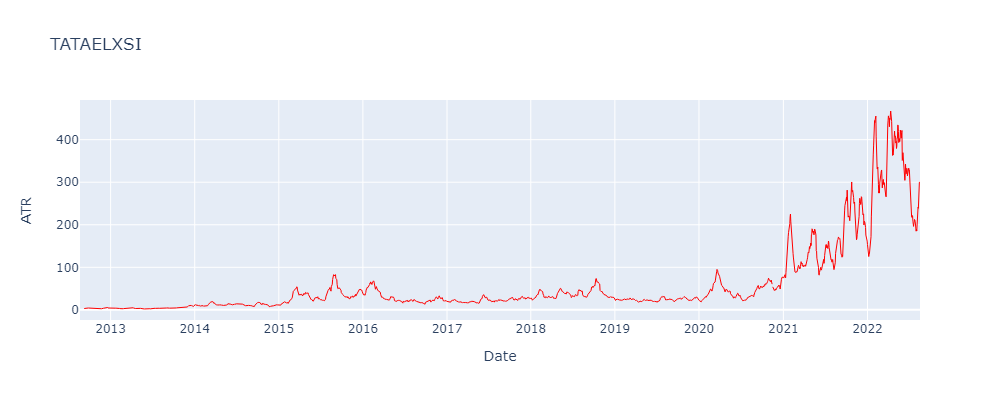

In [10]:
#ATR

#user input for ATR parameters
x = int(input("Enter period for ATR") or 14)

#getting necessary data for ATR plot
curr_high = stock_data['High']
curr_low = stock_data['Low']
prev_close = stock_data['Close'].shift(1)

a = abs(curr_high-prev_close)
b = abs(curr_low-prev_close)
c = curr_high - curr_low
        
temp_df = pd.concat([a, b, c], axis=1)
temp_df['True_Range'] = temp_df.max(axis=1)
temp_df['ATR'] = temp_df['True_Range'].rolling(x).mean()

#adding data to our df
stock_data['True_Range'] = temp_df['True_Range']
stock_data['ATR'] = temp_df['ATR']

#plotting
fig = go.Figure()

ATR_curve = go.Scatter(x=x_axis, y=temp_df['ATR'],
                      line=dict(color='red',width=1),
                      name='ATR')

fig.add_trace(trace=ATR_curve)

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), 
        dict(values=[])                      
        #dict(bounds=[15.5, 9.25], pattern="hour")
    ]
)

#labelling the chart
fig.update_layout(xaxis_title='Date',
                  yaxis_title="ATR",
                  title=stock_name,
                  width=1000, height=400)
fig.show("png")

9.) Average Directional Index (ADX)

[*********************100%***********************]  1 of 1 completed


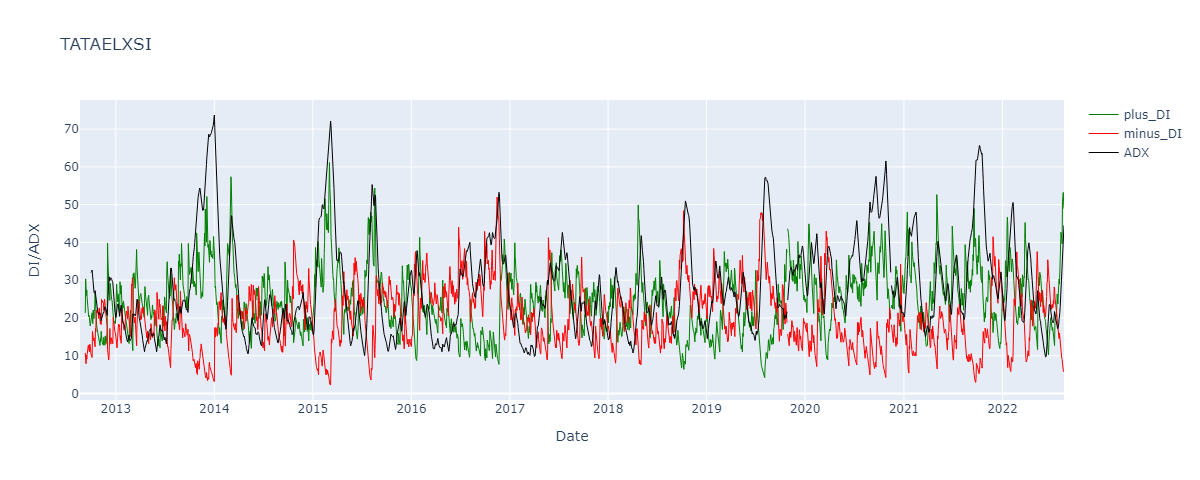

In [11]:
#ADX without library

#fetching historical data
temp_df = yf.download(tickers = stock_name + '.NS' ,period = '10y', interval = '1d')

#retrieving True Range from ATR.
temp_df['True_Range'] = stock_data['True_Range']
x_axis = temp_df.index

#getting data for plotting ADX
temp_df['plus_DM'] = np.where(((temp_df['High'] - temp_df['High'].shift(1)) >
                                 (temp_df['Low'].shift(1) - temp_df['Low'])) &
                                ((temp_df['High'] - temp_df['High'].shift(1)) > 0),
                                (temp_df['High'] - temp_df['High'].shift(1)),0)

temp_df['minus_DM'] = np.where(((temp_df['High'] - temp_df['High'].shift(1)) <
                                 (temp_df['Low'].shift(1) - temp_df['Low'])) &
                                ((temp_df['Low'].shift(1) - temp_df['Low']) > 0),
                                (temp_df['Low'].shift(1) - temp_df['Low']),0)

#function to implement wilder's smoothening for curves
def wilder_smoothening(name):
    smooth_it = 'smooth_'+name
    first_smooth = temp_df[name].head(14).sum()

    temp_df[smooth_it] = np.nan

    temp_df.at[temp_df.index[14],smooth_it] = first_smooth

    temp = first_smooth

    for i in range(15,temp_df.shape[0]):
        temp_df.at[temp_df.index[i],smooth_it] = temp - temp/14 + temp_df.loc[temp_df.index[i],name]
        temp = temp_df.loc[temp_df.index[i],smooth_it]

wilder_smoothening('True_Range')
wilder_smoothening('plus_DM')
wilder_smoothening('minus_DM')

#getting +DI and -DI and DX
temp_df['plus_DI'] = (temp_df['smooth_plus_DM']/temp_df['smooth_True_Range'])*100
temp_df['minus_DI'] = (temp_df['smooth_minus_DM']/temp_df['smooth_True_Range'])*100

temp_df['DX'] = ((abs(temp_df['plus_DI'] - temp_df['minus_DI']))/
                   (temp_df['plus_DI'] + temp_df['minus_DI'])) * 100

#getting ADX
temp_sum = 0
for i in range(15,28):
    temp_sum += temp_df.loc[temp_df.index[i],'DX']

first_ADX = temp_sum/14

temp_df['ADX'] = np.nan

temp_df.at[temp_df.index[28],'ADX'] = first_ADX

temp = first_ADX

for i in range(29,temp_df.shape[0]):
    temp_df.at[temp_df.index[i],'ADX'] = ((temp*13) + temp_df.loc[temp_df.index[i],'DX'])/14
    temp = temp_df.loc[temp_df.index[i],'ADX']
    
#adding data to our df
stock_data['plus_DI'] = temp_df['plus_DI']
stock_data['minus_DI'] = temp_df['minus_DI']
stock_data['ADX'] = temp_df['ADX']
 
#plotting ADX
fig = go.Figure()
                              

plus_DI = go.Scatter(x=x_axis, y=temp_df['plus_DI'], line=dict(color='green',width=1), name='plus_DI')
minus_DI = go.Scatter(x=x_axis, y=temp_df['minus_DI'], line=dict(color='red',width=1), name='minus_DI')
ADX = go.Scatter(x=x_axis, y=temp_df['ADX'], line=dict(color='Black',width=1), name='ADX')


fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), 
        dict(values=[])                      
        #dict(bounds=[15.5, 9.25], pattern="hour")
    ]
)

#labelling the chart
fig.update_layout(xaxis_title='Date',
                  yaxis_title="DI/ADX",
                  title=stock_name,
                  width=1200, height=480)
fig.add_trace(trace=plus_DI)
fig.add_trace(trace=minus_DI)
fig.add_trace(trace=ADX)

fig.show("png")


10.) Commodity Channel Indicator (CCI)

Enter the period



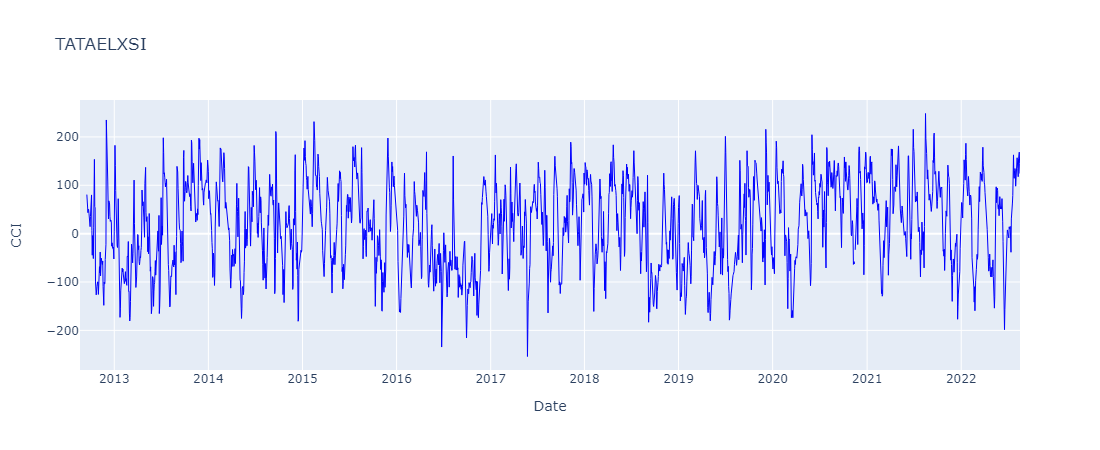

In [12]:
#CCI

#getting user input for CCI parameters
x = int(input("Enter the period\n") or 20)

#getting necessary data for plotting CCI
Typical_Price = (stock_data['High'] + 
                 stock_data['Low'] + 
                 stock_data['Close'])/3

TP_sma = Typical_Price.rolling(x).mean()
TP_std = Typical_Price.rolling(x).std()

CCI = (((Typical_Price) - (TP_sma))/(0.015*TP_std))

#plotting
fig = go.Figure()

CCI_curve = go.Scatter(x=x_axis, y=CCI,
                      line=dict(color='blue',width=1),
                      name='CCI')

fig.add_trace(trace=CCI_curve)

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), 
        dict(values=[])                      
        #dict(bounds=[15.5, 9.25], pattern="hour")
    ]
)

#labelling the chart
fig.update_layout(xaxis_title='Date',
                  yaxis_title="CCI",
                  title=stock_name,
                  width=1100, height=450)
fig.show("png")

11.) Parabolic Support and Resistance (PSAR)

[*********************100%***********************]  1 of 1 completed


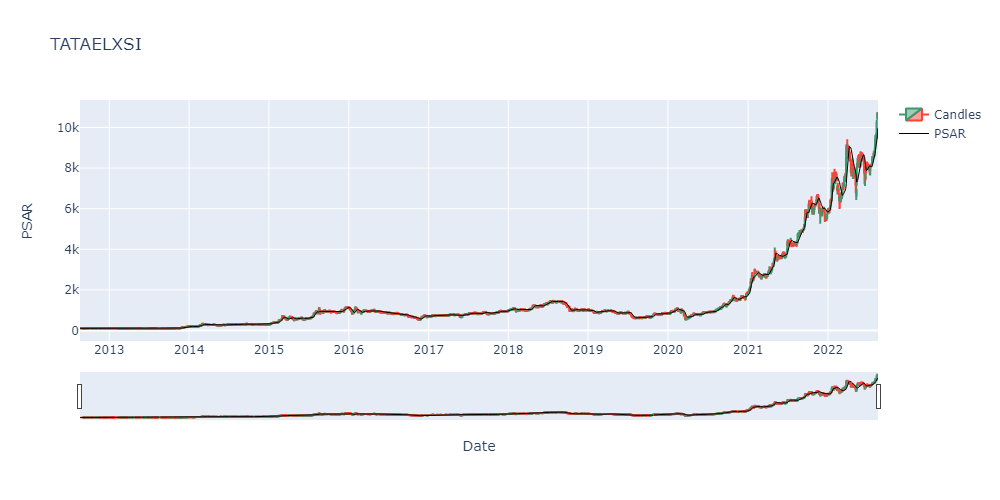

In [13]:
#plotting Parabolic SAR

#fetching historical stock data
temp_df = yf.download(tickers = stock_name + '.NS' ,period = '10y', interval = '1d')
x_axis = temp_df.index

#adding more attributes to store PSAR parameters
temp_df[['PSAR','EP','EP_PSAR','Acc_EP_PSAR','Acc','Trend']] = np.nan

#setting up initial values to further find PSAR
first_PSAR = temp_df.loc[temp_df.index[0],'Low']
first_EP = temp_df.loc[temp_df.index[0],'High']
first_trend = 1
    
#setting the initial values on our dataframe
temp_df.at[temp_df.index[0],'PSAR'] = first_PSAR
temp_df.at[temp_df.index[0],'EP'] = first_EP
temp_df.at[temp_df.index[0],'Trend'] = first_trend
temp_df.at[temp_df.index[0],'Acc'] = 0.02
temp_df.at[temp_df.index[0],'EP_PSAR'] = first_EP - first_PSAR
temp_df.at[temp_df.index[0],'Acc_EP_PSAR'] = (first_EP - first_PSAR)*0.02
    
#defining a PSAR function to calculate PSAR
def psar(i):
    #PSAR
    temp_df.at[temp_df.index[i],'PSAR'] = temp_df.loc[temp_df.index[i-1],'PSAR'] + temp_df.loc[temp_df.index[i-1],'Acc_EP_PSAR']
    
    #Trend
    
    if(temp_df.loc[temp_df.index[i],'PSAR'] < temp_df.loc[temp_df.index[i],'High']):
        temp_df.at[temp_df.index[i],'Trend'] = 1
    elif(temp_df.loc[temp_df.index[i],'PSAR'] > temp_df.loc[temp_df.index[i],'Low']):
        temp_df.at[temp_df.index[i],'Trend'] = -1
    
    #EP
    
    if(temp_df.loc[temp_df.index[i],'Trend'] == 1):
        if(temp_df.loc[temp_df.index[i],'High']>temp_df.loc[temp_df.index[i-1],'EP']):
            temp_df.at[temp_df.index[i],'EP'] = temp_df.loc[temp_df.index[i],'High']
        else:
            temp_df.at[temp_df.index[i],'EP'] = temp_df.loc[temp_df.index[i-1],'EP']
    elif(temp_df.loc[temp_df.index[i],'Trend'] == -1):
        if(temp_df.loc[temp_df.index[i],'Low']<temp_df.loc[temp_df.index[i-1],'EP']):
            temp_df.at[temp_df.index[i],'EP'] = temp_df.loc[temp_df.index[i],'Low']
        else:
            temp_df.at[temp_df.index[i],'EP'] = temp_df.loc[temp_df.index[i-1],'EP']
    
    #EP_PSAR
    
    temp_df.at[temp_df.index[i],'EP_PSAR'] = temp_df.at[temp_df.index[i],'EP'] - temp_df.at[temp_df.index[i],'PSAR']
    
    #Acc
  
    if(temp_df.loc[temp_df.index[i],'Trend'] == temp_df.loc[temp_df.index[i-1],'Trend']):
        if(temp_df.loc[temp_df.index[i],'Trend'] == 1):
            if(temp_df.loc[temp_df.index[i],'EP'] > temp_df.loc[temp_df.index[i-1],'EP']):
                if(temp_df.loc[temp_df.index[i-1],'Acc']>0.2):
                    temp_df.at[temp_df.index[i],'Acc'] = 0.2
                else:
                    temp_df.at[temp_df.index[i],'Acc'] = temp_df.loc[temp_df.index[i-1],'Acc'] + 0.02
            else:
                temp_df.at[temp_df.index[i],'Acc'] = temp_df.loc[temp_df.index[i-1],'Acc']

        if(temp_df.loc[temp_df.index[i],'Trend'] == -1):
            if(temp_df.loc[temp_df.index[i],'EP'] < temp_df.loc[temp_df.index[i-1],'EP']):
                if(temp_df.loc[temp_df.index[i-1],'Acc'] < 0.2):
                    temp_df.at[temp_df.index[i],'Acc'] = temp_df.loc[temp_df.index[i-1],'Acc'] + 0.02
                else:
                    temp_df.at[temp_df.index[i],'Acc'] = 0.2
            else:
                temp_df.at[temp_df.index[i],'Acc'] = temp_df.loc[temp_df.index[i-1],'Acc']
    else:
        temp_df.at[temp_df.index[i],'Acc'] = 0.02
    
    #Acc_EP_PSAR
    
    temp_df.at[temp_df.index[i],'Acc_EP_PSAR'] = temp_df.at[temp_df.index[i],'EP_PSAR'] * temp_df.at[temp_df.index[i],'Acc']
     
for x in range(1, temp_df.shape[0]):
    psar(x)

#adding data to our df
stock_data['PSAR'] = temp_df['PSAR']
stock_data['Trend'] = temp_df['Trend']
    
#plotting PSAR
candle = go.Candlestick(x=x_axis,
                       open=temp_df['Open'],
                       low=temp_df['Low'],
                       high=temp_df['High'],
                       close=temp_df['Close'],
                       name='Candles')

PSAR_data = go.Scatter(x=x_axis, y=temp_df['PSAR'], line=dict(color='black',width=1), name='PSAR')

fig = go.Figure()

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), 
        dict(values=[])                      
        #dict(bounds=[15.5, 9.25], pattern="hour")
    ]
)

#updating chart
fig.update_layout(xaxis_title='Date',
                  yaxis_title="PSAR",
                  title=stock_name,
                  width=1000, height=500)
fig.add_trace(trace=candle)
fig.add_trace(trace=PSAR_data)

fig.show("png")

TRENDLINE

Enter the periods for a trend to be considered



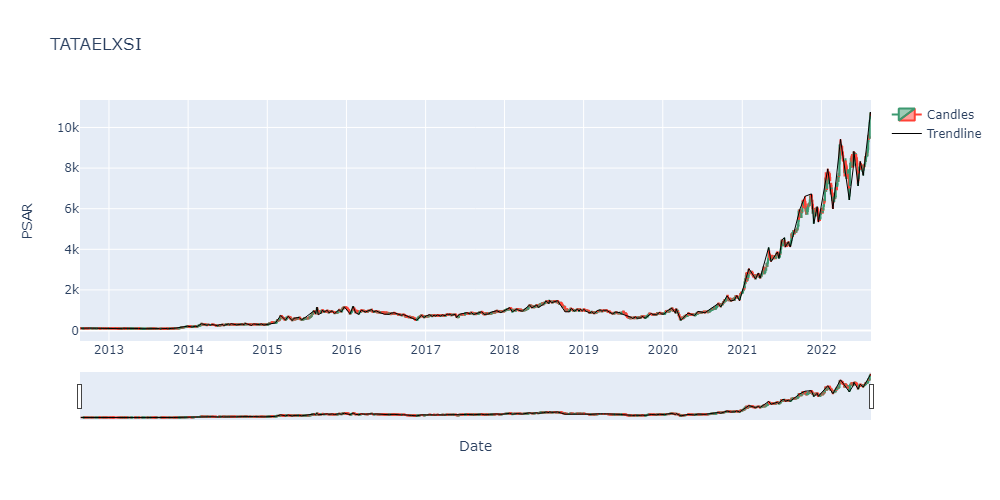

In [14]:
#Generating dataset for local maxima and minima to draw a trendline and identify uptrend or downtrend
x = int(input("Enter the periods for a trend to be considered\n") or 7)

local_maxima = np.array(argrelextrema(stock_data['High'].values, np.greater, order=x))
local_minima = np.array(argrelextrema(stock_data['Low'].values, np.less, order=x))

peaks_x_data = []
peaks_y_data = []
peaks_z_data = []

for i in range(local_maxima.size):
    peaks_x_data.append(stock_data.index[local_maxima[0,i]])
    peaks_y_data.append(stock_data.loc[stock_data.index[local_maxima[0,i]],'High'])
    peaks_z_data.append(1)
    
valleys_x_data = []   
valleys_y_data = []
valleys_z_data = []

for i in range(local_minima.size):
    valleys_x_data.append(stock_data.index[local_minima[0,i]])
    valleys_y_data.append(stock_data.loc[stock_data.index[local_minima[0,i]],'Low'])
    valleys_z_data.append(-1)
    
df = pd.DataFrame()

df['x_data'] = np.hstack((peaks_x_data, valleys_x_data))
df['y_data'] = np.hstack((peaks_y_data, valleys_y_data))
df['Peak_Valley'] = np.hstack((peaks_z_data, valleys_z_data))

df.sort_values('x_data',inplace=True)

#adding data to our df

df.reset_index()
stock_data['Peak_Valley'] = 0

for i in range(df.shape[0]):
    stock_data.at[df.loc[i,'x_data'],'Peak_Valley'] = df.loc[i,'Peak_Valley']

#plotting
candle = go.Candlestick(x=x_axis,
                       open=stock_data['Open'],
                       low=stock_data['Low'],
                       high=stock_data['High'],
                       close=stock_data['Close'],
                       name='Candles')

trends = go.Scatter(x=df['x_data'], y=df['y_data'], line=dict(color='black',width=1), name='Trendline')

fig = go.Figure()

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), 
        dict(values=[])                      
        #dict(bounds=[15.5, 9.25], pattern="hour")
    ]
)

#updating chart
fig.update_layout(xaxis_title='Date',
                  yaxis_title="PSAR",
                  title=stock_name,
                  width=1000, height=500)
fig.add_trace(trace=candle)
fig.add_trace(trace=trends)

fig.show("png")

Storing Trend Data and Trend Reversal Data Points

In [15]:
# 1  : uptrend
# -1 : downtrend
# 0  : reversal

#new column to store main trend
stock_data['Main_Trend'] = 0

extreme_datapoints = np.hstack((local_maxima,local_minima))
extreme_datapoints.sort()

#first extreme
if(extreme_datapoints[0,0] == local_maxima[0,0]):
    first_extreme = 1
elif(extreme_datapoints[0,0] == local_minima[0,0]):
    first_extreme = -1
    
curr_trend = first_extreme
index = 0

for i in range(stock_data.shape[0]):
    if(i != extreme_datapoints[0,index]):
        stock_data.at[stock_data.index[i],'Main_Trend'] = curr_trend
    elif(i == extreme_datapoints[0,index]):
        stock_data.at[stock_data.index[i],'Main_Trend'] = 0
        if(index < extreme_datapoints.size):
            index += 1
        elif(index == extreme_datapoints.size-1):
            index = index
        if(curr_trend == 1):
            curr_trend = -1
        elif(curr_trend == -1):
            curr_trend = 1

Plotting Support and Resistance based on Reversal points and not Accumulation phase

Enter in what range(%) wrt ltp you want to find support and resistance

Enter the allowable variation in support and resistance levels



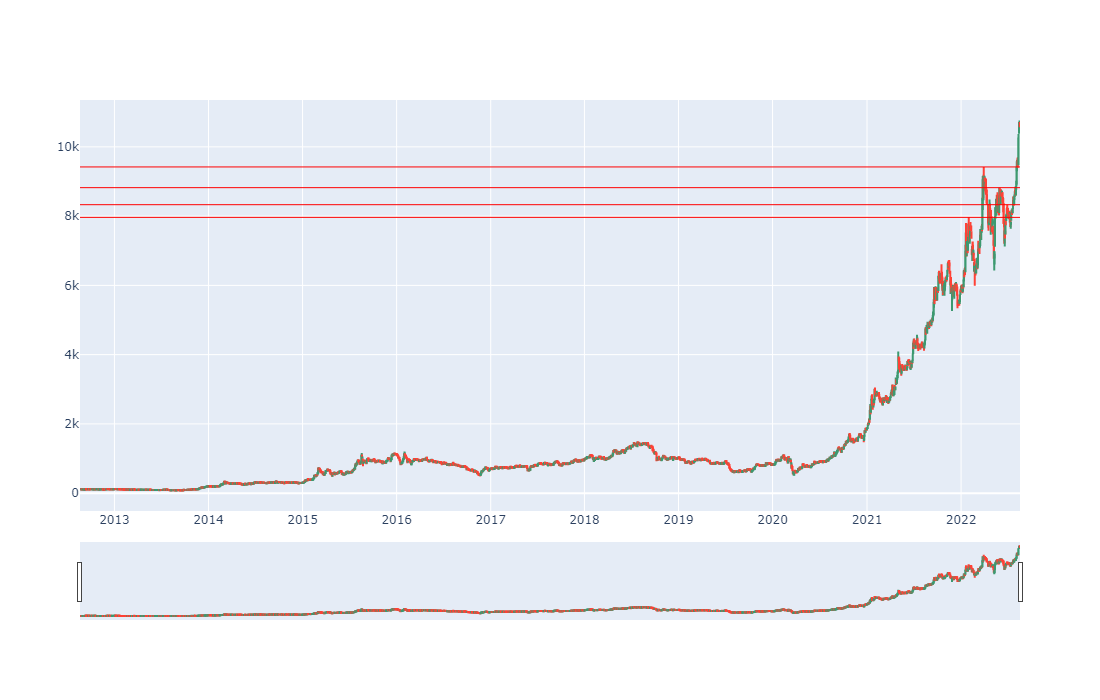

In [16]:
#plotting candlesticks

candle = go.Candlestick(x=x_axis,
                       open=stock_data['Open'],
                       low=stock_data['Low'],
                       high=stock_data['High'],
                       close=stock_data['Close'],
                       name='Candles')

fig = go.Figure()
fig.add_trace(trace=candle)
fig.update_layout(height=700,width=1100)
fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), 
        dict(values=[])                      
        #dict(bounds=[15.5, 9.25], pattern="hour")
    ]
)

ltp = stock_data.loc[stock_data.index[stock_data.shape[0]-1],'Close']
x = float(input("Enter in what range(%) wrt ltp you want to find support and resistance\n") or 25)/100
y = float(input("Enter the allowable variation in support and resistance levels\n") or 2)/100
upper_limit = ltp*(1+x)
lower_limit = ltp*(1-x)

#plotting Support levels
support = []
support_values = []
filt = (stock_data['Peak_Valley'] == -1)
for i in range(stock_data[filt].shape[0]):
    if(lower_limit<=stock_data[filt].loc[stock_data[filt].index[i],'Low']<=upper_limit):
        support.append(stock_data[filt].loc[stock_data[filt].index[i],'Low'])
support.sort()
temp_values = []
for i in range(len(support)-1):
    if(support[i] in temp_values):
        continue
    elif(support[i] not in temp_values):
        temp_values.append(support[i])
        if(support[i+1]<=support[i]*(1+y)):
            temp_values.append(support[i+1])
            support_values.append((support[i]+support[i+1])/2)
        elif(support[i+1] > support[i]*(1+y)):
            support_values.append(support[i])
            
for value in support_values:
    fig.add_hline(y=value, line_width=1, line_dash="solid", line_color="green")

    
#plotting Resistance levels
resistance = []
resistance_values = []
filt = (stock_data['Peak_Valley'] == 1)
for i in range(stock_data[filt].shape[0]):
    if(lower_limit<=stock_data[filt].loc[stock_data[filt].index[i],'High']<=upper_limit):
        resistance.append(stock_data[filt].loc[stock_data[filt].index[i],'High'])
resistance.sort()
temp_values = []
for i in range(len(resistance)-1):
    if(resistance[i] in temp_values):
        continue
    elif(resistance[i] not in temp_values):
        temp_values.append(resistance[i])
        if(resistance[i+1]<=resistance[i]*(1+y)):
            temp_values.append(resistance[i+1])
            resistance_values.append((resistance[i]+resistance[i+1])/2)
        elif(resistance[i+1] > resistance[i]*(1+y)):
            resistance_values.append(resistance[i])
            
for value in resistance_values:
    fig.add_hline(y=value, line_width=1, line_dash="solid", line_color="red")
    
fig.show("png")

Drawing Trendline based on Close price rather than Highs and Lows

Enter the periods for a trend to be considered



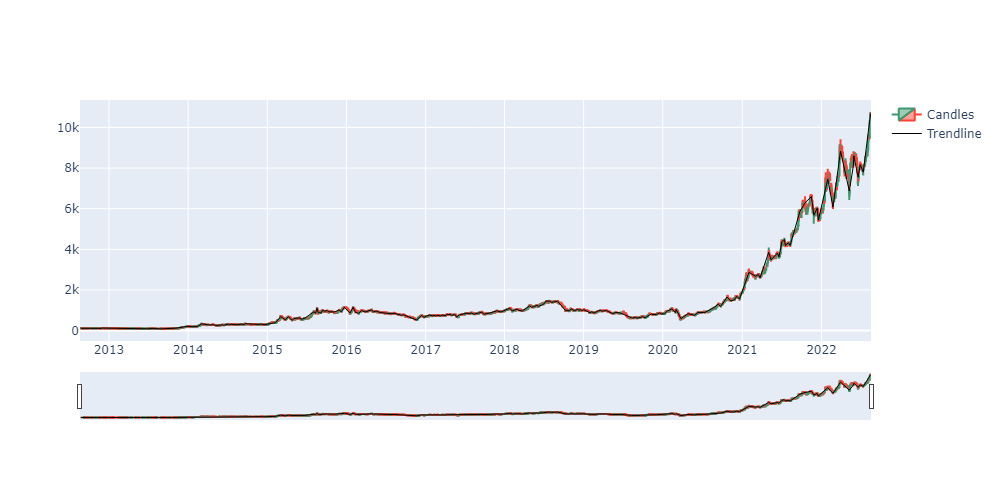

In [17]:
#Trendline based on Close price

#user input for trend period
x = int(input("Enter the periods for a trend to be considered\n") or 7)

#getting local minima and local maxima
local_maxima = np.array(argrelextrema(stock_data['High'].values, np.greater, order=x))
local_minima = np.array(argrelextrema(stock_data['Low'].values, np.less, order=x))

#merging and sorting local minima and local maxima data
trendline_data = np.hstack((local_maxima, local_minima))
sorted_trendline_data = np.sort(trendline_data)

x_data = []
y_data = []

for i in range(sorted_trendline_data.size):
    x_data.append(stock_data.index[sorted_trendline_data[0,i]])
    y_data.append(stock_data.loc[stock_data.index[sorted_trendline_data[0,i]],'Close'])
    
#plotting
candle = go.Candlestick(x=x_axis,
                       open=stock_data['Open'],
                       low=stock_data['Low'],
                       high=stock_data['High'],
                       close=stock_data['Close'],
                       name='Candles')

trends = go.Scatter(x=x_data, y=y_data, line=dict(color='black',width=1), name='Trendline')

fig = go.Figure()

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), 
        dict(values=[])                      
        #dict(bounds=[15.5, 9.25], pattern="hour")
    ]
)

fig.update_layout(height=500, width=1000)
fig.add_trace(trace=candle)
fig.add_trace(trace=trends)

fig.show("png")

Storing Trend Data and Trend Reversal Data Points

In [18]:
stock_data_indicator_df = stock_data.copy()
#storing indicator data in stock_data_indicator_df
stock_data_indicator_df.to_csv('stock_data_indicator_df.csv')
ichimoku_df.to_csv('ichimoku_df.csv')